In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [2]:
train_data = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')
test_data = pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')
sample_sub_data = pd.read_csv('/kaggle/input/spaceship-titanic/sample_submission.csv')

In [3]:
print(train_data)

     PassengerId HomePlanet CryoSleep     Cabin    Destination   Age    VIP  \
0        0001_01     Europa     False     B/0/P    TRAPPIST-1e  39.0  False   
1        0002_01      Earth     False     F/0/S    TRAPPIST-1e  24.0  False   
2        0003_01     Europa     False     A/0/S    TRAPPIST-1e  58.0   True   
3        0003_02     Europa     False     A/0/S    TRAPPIST-1e  33.0  False   
4        0004_01      Earth     False     F/1/S    TRAPPIST-1e  16.0  False   
...          ...        ...       ...       ...            ...   ...    ...   
8688     9276_01     Europa     False    A/98/P    55 Cancri e  41.0   True   
8689     9278_01      Earth      True  G/1499/S  PSO J318.5-22  18.0  False   
8690     9279_01      Earth     False  G/1500/S    TRAPPIST-1e  26.0  False   
8691     9280_01     Europa     False   E/608/S    55 Cancri e  32.0  False   
8692     9280_02     Europa     False   E/608/S    TRAPPIST-1e  44.0  False   

      RoomService  FoodCourt  ShoppingMall     Spa 

In [4]:
print(test_data)

     PassengerId HomePlanet CryoSleep     Cabin    Destination   Age    VIP  \
0        0013_01      Earth      True     G/3/S    TRAPPIST-1e  27.0  False   
1        0018_01      Earth     False     F/4/S    TRAPPIST-1e  19.0  False   
2        0019_01     Europa      True     C/0/S    55 Cancri e  31.0  False   
3        0021_01     Europa     False     C/1/S    TRAPPIST-1e  38.0  False   
4        0023_01      Earth     False     F/5/S    TRAPPIST-1e  20.0  False   
...          ...        ...       ...       ...            ...   ...    ...   
4272     9266_02      Earth      True  G/1496/S    TRAPPIST-1e  34.0  False   
4273     9269_01      Earth     False       NaN    TRAPPIST-1e  42.0  False   
4274     9271_01       Mars      True   D/296/P    55 Cancri e   NaN  False   
4275     9273_01     Europa     False   D/297/P            NaN   NaN  False   
4276     9277_01      Earth      True  G/1498/S  PSO J318.5-22  43.0  False   

      RoomService  FoodCourt  ShoppingMall     Spa 

In [5]:
print(sample_sub_data)

     PassengerId  Transported
0        0013_01        False
1        0018_01        False
2        0019_01        False
3        0021_01        False
4        0023_01        False
...          ...          ...
4272     9266_02        False
4273     9269_01        False
4274     9271_01        False
4275     9273_01        False
4276     9277_01        False

[4277 rows x 2 columns]


In [6]:
test_id = test_data.PassengerId.copy()

<AxesSubplot:>

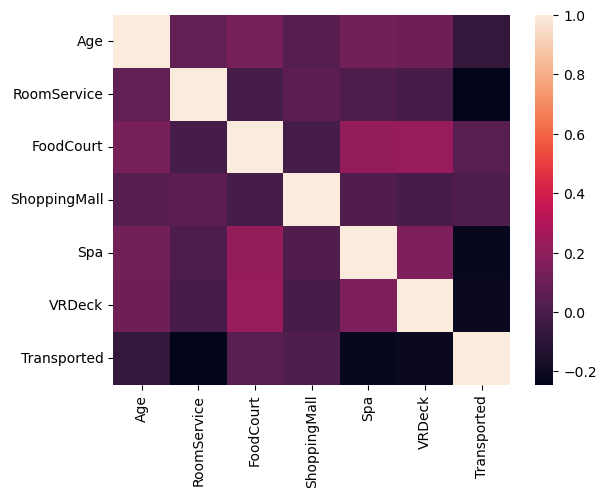

In [7]:
corr = train_data.corr()
sns.heatmap(corr)

<AxesSubplot:xlabel='Destination', ylabel='count'>

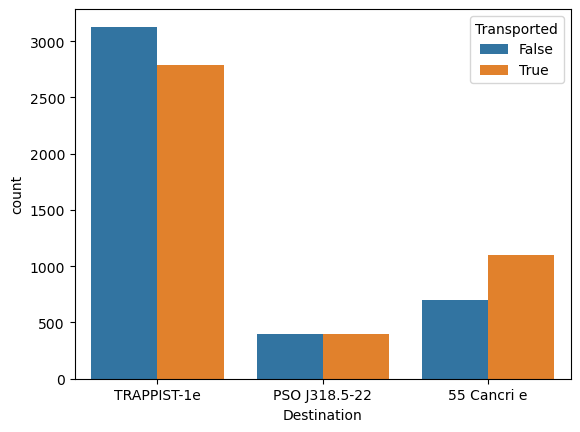

In [8]:
sns.countplot(data = train_data, x = "Destination", hue="Transported")

In [9]:
train_data.Transported.value_counts()

True     4378
False    4315
Name: Transported, dtype: int64

In [10]:
sample_sub_data.Transported.value_counts()

False    4277
Name: Transported, dtype: int64

In [11]:
train_data.RoomService.value_counts()

0.0       5577
1.0        117
2.0         79
3.0         61
4.0         47
          ... 
1612.0       1
2598.0       1
632.0        1
378.0        1
745.0        1
Name: RoomService, Length: 1273, dtype: int64

In [12]:
train_data.FoodCourt.value_counts()

0.0       5456
1.0        116
2.0         75
3.0         53
4.0         53
          ... 
3846.0       1
5193.0       1
312.0        1
827.0        1
4688.0       1
Name: FoodCourt, Length: 1507, dtype: int64

In [13]:
train_data.RoomService.value_counts()

0.0       5577
1.0        117
2.0         79
3.0         61
4.0         47
          ... 
1612.0       1
2598.0       1
632.0        1
378.0        1
745.0        1
Name: RoomService, Length: 1273, dtype: int64

In [14]:
train_data.VIP.value_counts()

False    8291
True      199
Name: VIP, dtype: int64

<AxesSubplot:xlabel='VIP', ylabel='count'>

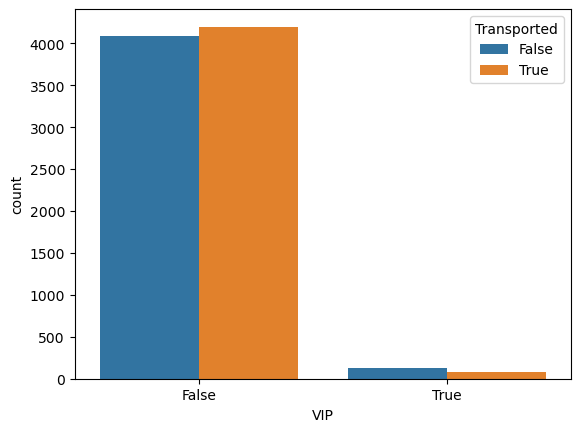

In [15]:
sns.countplot(x = 'VIP', hue = "Transported", data = train_data)

<AxesSubplot:xlabel='HomePlanet', ylabel='count'>

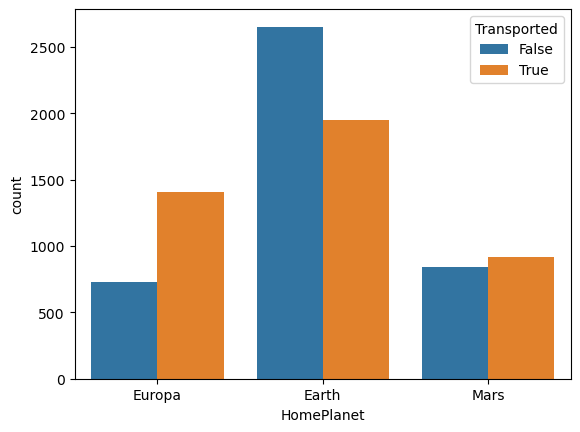

In [16]:
sns.countplot(x = 'HomePlanet', hue = "Transported", data = train_data)

In [17]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [18]:
train_data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [19]:
x = train_data.drop(['Transported', "Cabin", "Name", "PassengerId"], axis = 1)
y = train_data['Transported']
x_test = test_data.drop(["Cabin", "Name", "PassengerId"], axis = 1)
y_test = sample_sub_data.iloc[:, 1:]

In [20]:
x = pd.get_dummies(x)
x_test = pd.get_dummies(x_test)
y_test = pd.get_dummies(y_test)

In [21]:
missing_vals = x.isnull().sum()
print(missing_vals[missing_vals > 0])

Age             179
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
dtype: int64


In [22]:
x = x.fillna(x.mean())

In [23]:
x_test = x_test.fillna(x_test.mean())

In [24]:
missing_vals = x.isnull().sum()
print(missing_vals[missing_vals > 0])

Series([], dtype: int64)


In [25]:
from lightgbm import LGBMClassifier
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

p = Pipeline ([
    ("std", StandardScaler()),
    ("lgbm", LGBMClassifier(learning_rate=0.05, n_estimators = 100)),
])
kfold = RepeatedStratifiedKFold(n_splits=20, n_repeats=5, random_state=1)
n_scores = cross_val_score(p, x, y, scoring='accuracy', cv=kfold, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.798 (0.018)


In [26]:
prediction = p.fit( 
    x, y, 
)

In [27]:
preds = p.predict(x)

In [28]:
preds

array([ True, False, False, ...,  True, False,  True])

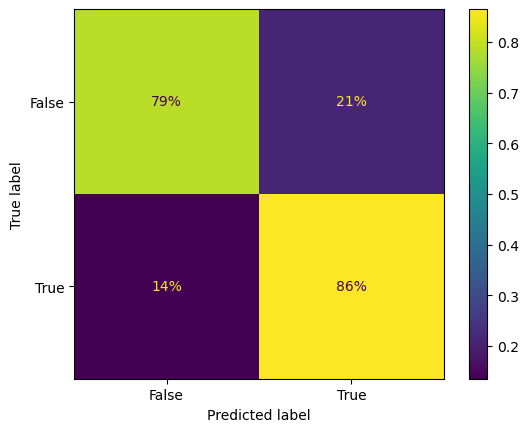

In [29]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

confusion_matrix(y, preds)

ConfusionMatrixDisplay.from_predictions(y, preds, normalize = "true", values_format = ".0%")
plt.show()

In [30]:
preds_test = p.predict(x_test)

In [31]:
preds_test = preds_test.flatten()

In [32]:
output = pd.DataFrame({'PassengerId': test_id,
                       'Transported': preds_test.astype(bool)})

output.to_csv('submission.csv', index=False)